## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

%matplotlib inline

In [52]:
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 17.03


In [53]:
# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=1.0)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [54]:
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
lasso.coef_

array([-0.07256167,  0.049677  , -0.        ,  0.        , -0.        ,
        0.80504721,  0.02330318, -0.68471274,  0.26857502, -0.01526236,
       -0.71722423,  0.00834102, -0.77160917])

In [55]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 23.25


In [56]:
# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=1.0)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = ridge.predict(x_test)

In [57]:
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值都明顯小了許多
print(ridge.coef_)

[-1.21252383e-01  4.95144936e-02 -1.12401718e-02  2.89351315e+00
 -1.00608832e+01  3.66023694e+00 -4.37201416e-03 -1.38975681e+00
  3.01632305e-01 -1.32209825e-02 -8.52842040e-01  9.96596180e-03
 -5.44637977e-01]


In [58]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 17.34


Text(0,0.5,'Mean Square Error')

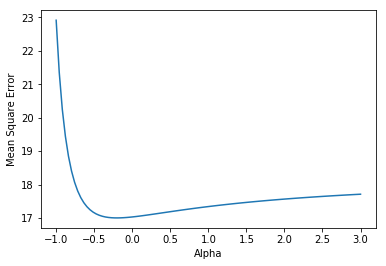

In [47]:
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

alphas = np.linspace(-1, 3, 100)
mse = list()

for alpha in alphas:
    # 建立一個線性回歸模型
    ridge = linear_model.Ridge(alpha=alpha)
    # 將訓練資料丟進去模型訓練
    ridge.fit(x_train, y_train)
    # 將測試資料丟進模型得到預測結果
    y_pred = ridge.predict(x_test)
    mse.append(mean_squared_error(y_test, y_pred))

plt.plot(alphas, mse)
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error')

Text(0,0.5,'Mean Square Error')

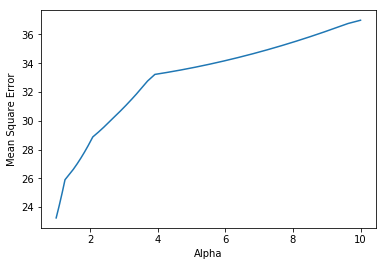

In [49]:
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

alphas = np.linspace(1, 10, 1000)
mse = list()

for alpha in alphas:
    # 建立一個線性回歸模型
    lasso = linear_model.Lasso(alpha=alpha)
    # 將訓練資料丟進去模型訓練
    lasso.fit(x_train, y_train)
    # 將測試資料丟進模型得到預測結果
    y_pred = lasso.predict(x_test)
    mse.append(mean_squared_error(y_test, y_pred))

plt.plot(alphas, mse)
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error')